In [9]:
!pip install numpy
!pip install pandas
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn
!pip install wordcloud
!pip install nltk
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 7.7 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 3.5 MB/s eta 0:00:00


## Understanding the data

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import re

In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
df.head()

,text,humor
0,"Joe biden rules out 2020 bid: 'guys, i'm not r...",False
1,Watch: darvish gave hitter whiplash with slow ...,False
2,What do you call a turtle without its shell? d...,True
3,5 reasons the 2016 election feels so personal,False
4,"Pasco police shot mexican migrant from behind,...",False


In [4]:
df.shape

(200000, 2)

Check for duplicates and missing values

In [5]:
df[df.duplicated()]

,text,humor


In [6]:
df[df.isna().any(axis=1)]

,text,humor


We have no duplicates and no missing values.

In [7]:
df['humor'].value_counts()

humor
False    100000
True     100000
Name: count, dtype: int64

We can see that we have a balanced dataset, so we do not have to use oversampling techniques.

## Further preparation of data for EDA

In [16]:
import re

import contractions
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from numpy import *
import seaborn as sns
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import tokenize
from nltk.tokenize import TweetTokenizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS


# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Counts and Length:
1. Character count
2. Word count
3. Mean word length
4. Mean sentence length

In [9]:
# length of a sample piece of text
length = len(df['text'][0])
print(f'Length of a sample review: {length}')

Length of a sample review: 53


In [10]:
df['length'] = df['text'].str.len()
df.head()

,text,humor,length
0,"Joe biden rules out 2020 bid: 'guys, i'm not r...",False,53
1,Watch: darvish gave hitter whiplash with slow ...,False,51
2,What do you call a turtle without its shell? d...,True,50
3,5 reasons the 2016 election feels so personal,False,45
4,"Pasco police shot mexican migrant from behind,...",False,64


Getting the word counts in each piece of text

In [11]:
def word_count(text):
    text_list = text.split()
    return len(text_list)

In [12]:
df['word_count'] = df['text'].apply(word_count)
df.head()

,text,humor,length,word_count
0,"Joe biden rules out 2020 bid: 'guys, i'm not r...",False,53,10
1,Watch: darvish gave hitter whiplash with slow ...,False,51,8
2,What do you call a turtle without its shell? d...,True,50,10
3,5 reasons the 2016 election feels so personal,False,45,8
4,"Pasco police shot mexican migrant from behind,...",False,64,10


Mean word length: The average length of words

In [13]:
df['mean_word_length'] = df['text'].map(lambda t: np.mean([len(word) for word in t.split()]))
df.head()

,text,humor,length,word_count,mean_word_length
0,"Joe biden rules out 2020 bid: 'guys, i'm not r...",False,53,10,4.40
1,Watch: darvish gave hitter whiplash with slow ...,False,51,8,5.50
2,What do you call a turtle without its shell? d...,True,50,10,4.10
3,5 reasons the 2016 election feels so personal,False,45,8,4.75
4,"Pasco police shot mexican migrant from behind,...",False,64,10,5.50


Mean sentence length: average length of sentences

In [17]:
df['mean_sent_length'] = df['text'].map(lambda t: np.mean([len(sent) for sent in tokenize.sent_tokenize(t)]))
df.head(10)

,text,humor,length,word_count,mean_word_length,mean_sent_length
0,"Joe biden rules out 2020 bid: 'guys, i'm not r...",False,53,10,4.400000,53.0
1,Watch: darvish gave hitter whiplash with slow ...,False,51,8,5.500000,51.0
2,What do you call a turtle without its shell? d...,True,50,10,4.100000,24.5
3,5 reasons the 2016 election feels so personal,False,45,8,4.750000,45.0
4,"Pasco police shot mexican migrant from behind,...",False,64,10,5.500000,64.0
5,"Martha stewart tweets hideous food photo, twit...",False,70,9,6.888889,70.0
6,What is a pokemon master's favorite kind of pa...,True,65,10,5.600000,32.0
7,Why do native americans hate it when it rains ...,True,85,15,4.733333,42.0
8,"Obama's climate change legacy is impressive, i...",False,69,9,6.777778,69.0
9,"My family tree is a cactus, we're all pricks.",True,45,9,4.111111,45.0


Function to visualize the columns

In [34]:
def visualize(col):
    
    print()
    plt.figure(figsize=(15, 8))
    plt.subplot(1,2,1)
    sns.boxplot(data=df, y=col, hue='humor')
    plt.ylabel(col, labelpad=12.5)
    
    plt.subplot(1,2,2)
    sns.kdeplot(data=df, x=col, hue='humor')
    plt.legend(df['humor'].unique())
    plt.xlabel('')
    plt.ylabel('')
    
    plt.show()

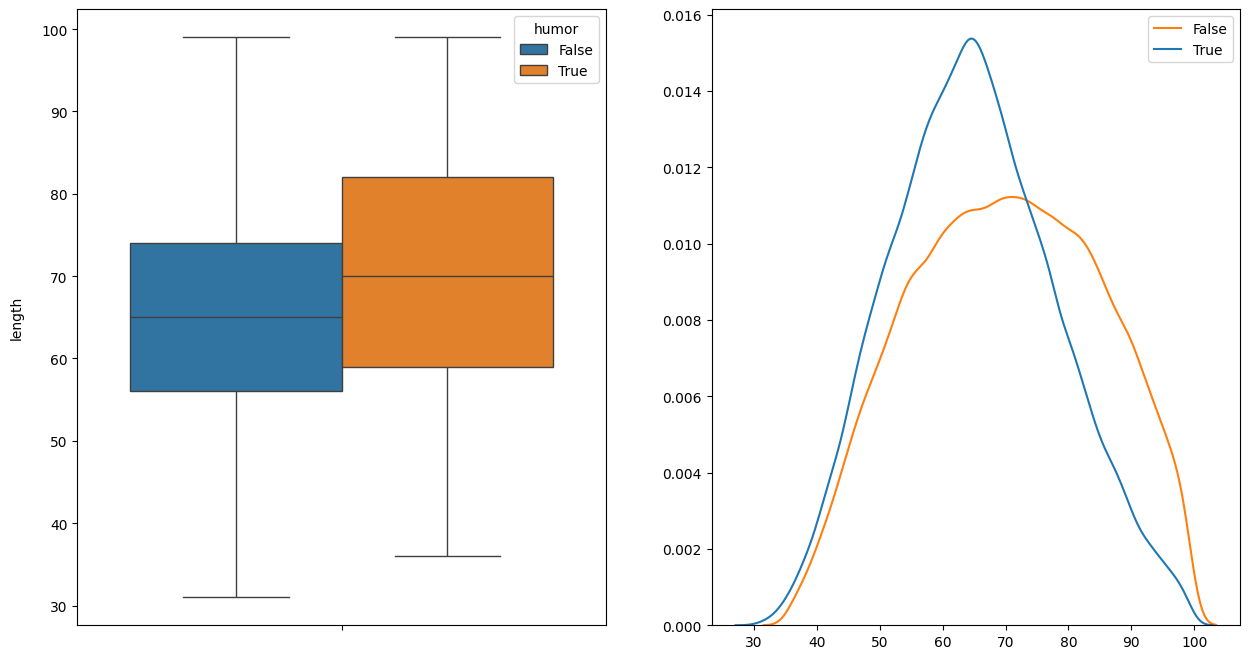

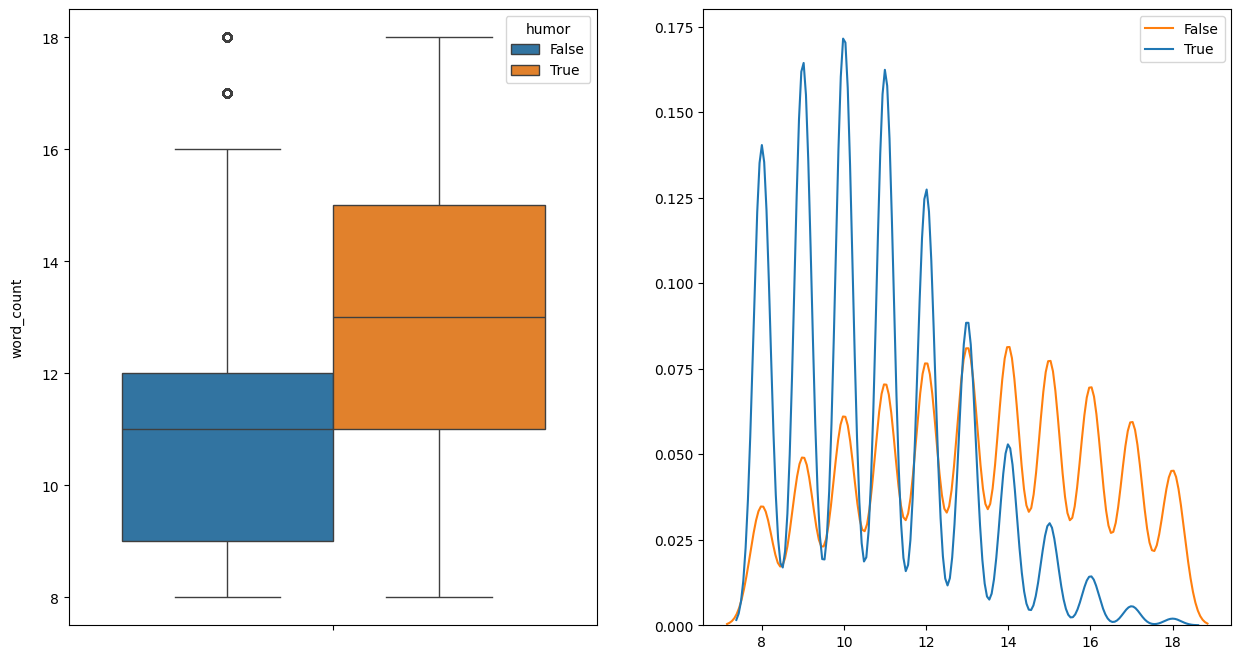

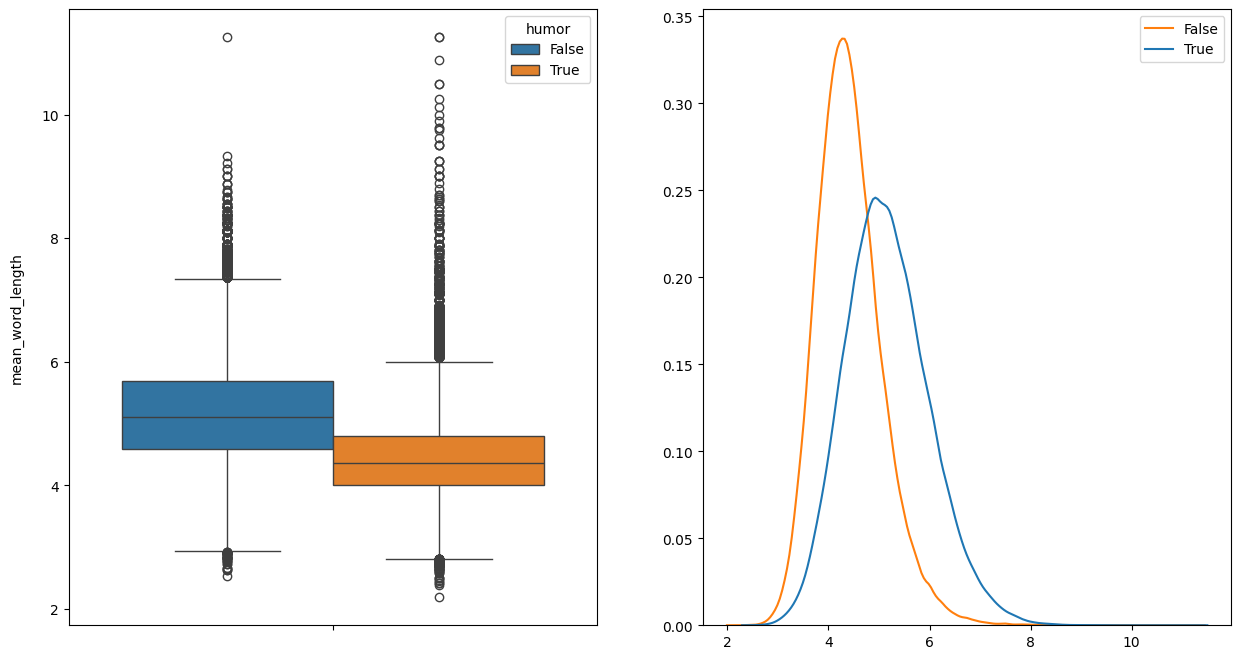

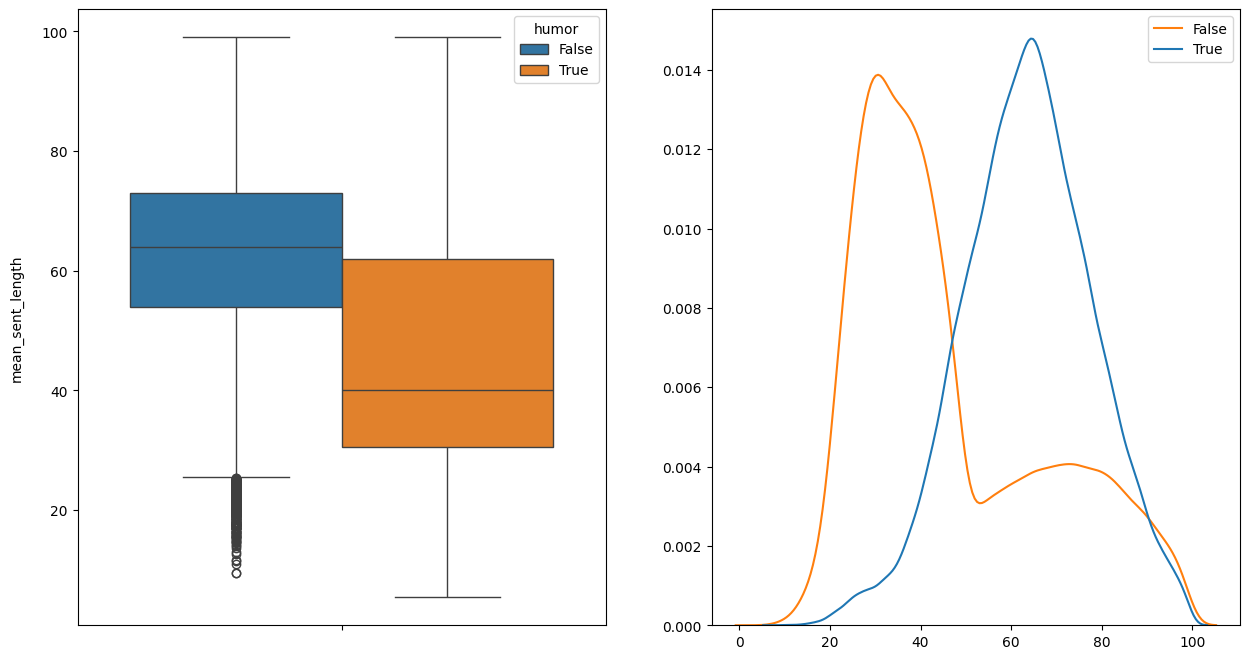

In [35]:
features = df.columns.tolist()[2:]
for feature in features:
    visualize(feature)

We can see that:

1. The sentence lengths for humorous texts and non-humorous texts are unimodal, with similar mean and non-humorous texts having a larger variance
2. Word counts for both humorous and non-humorous texts have multiple mounds
3. Mean word length for both humorous and non-humorous texts have many outliers, and distribution seems to be right-skewed
4. Mean sentence length for non-humorous texts have 2 mounds, and some outliers

In [22]:
df.columns.tolist()[2:]

['length', 'word_count', 'mean_word_length', 'mean_sent_length']

Removal of punctuation marks